In [5]:
# Importing Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [6]:
# Turn the project folder path into a string 
path = r'C:\Users\Kalyani\Documents\Instacart_Basket_Analysis'

In [7]:
path

'C:\\Users\\Kalyani\\Documents\\Instacart_Basket_Analysis'

# STEP 2

In [8]:
# Importing "ords_prods_custs_merged.pkl” data set from your “Prepared Data” folder as Instacart
Instacart = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared_data', 'ords_prods_custs_merged.pkl'))

In [9]:
Instacart.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_previous_order,product_id,add_to_cart_order,reordered,product_name,...,median_of_days,frequency_flag,gender,state,age,date_joined,n_dependants,marital_status,income,_merge
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,20.5,Non_frequent Customer,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,20.5,Non_frequent Customer,Female,Alabama,31,2/17/2019,3,married,40423,both
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,20.5,Non_frequent Customer,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,20.5,Non_frequent Customer,Female,Alabama,31,2/17/2019,3,married,40423,both
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,20.5,Non_frequent Customer,Female,Alabama,31,2/17/2019,3,married,40423,both


We addressed potential PII concerns by suppressing all identifiable customer information before analysis. 

In [10]:
# Check shape of dataframe
Instacart.shape

(32404859, 31)

# STEP 3

In [11]:
# Let's create separate lists of states for region columns.
northeast_region =  ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']

In [12]:
midwest_region = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']

In [13]:
south_region = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']

In [14]:
west_region = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

In [15]:
# Lets assign regions for states.

In [16]:
Instacart.loc[Instacart['state'].isin(northeast_region), 'region'] = 'northeast'

In [17]:
Instacart.loc[Instacart['state'].isin(midwest_region), 'region'] = 'midwest'

In [18]:
Instacart.loc[Instacart['state'].isin(south_region), 'region'] = 'south'

In [19]:
Instacart.loc[Instacart['state'].isin(west_region), 'region'] = 'west'

In [20]:
# Lets check dataframe
Instacart.tail()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_previous_order,product_id,add_to_cart_order,reordered,product_name,...,frequency_flag,gender,state,age,date_joined,n_dependants,marital_status,income,_merge,region
32404854,156685,106143,26,4,23,5.0,19675,1,1,Organic Raspberry Black Tea,...,frequent customer,Male,Hawaii,25,5/26/2017,0,single,53755,both,west
32404855,484769,66343,1,6,11,NaN,47210,1,0,Fresh Farmed Tilapia Fillet,...,Non_frequent Customer,Female,Tennessee,22,9/12/2017,3,married,46151,both,south
32404856,1561557,66343,2,1,11,30.0,47210,1,1,Fresh Farmed Tilapia Fillet,...,Non_frequent Customer,Female,Tennessee,22,9/12/2017,3,married,46151,both,south
32404857,276317,66343,3,6,15,19.0,47210,1,1,Fresh Farmed Tilapia Fillet,...,Non_frequent Customer,Female,Tennessee,22,9/12/2017,3,married,46151,both,south
32404858,2922475,66343,4,1,12,30.0,47210,1,1,Fresh Farmed Tilapia Fillet,...,Non_frequent Customer,Female,Tennessee,22,9/12/2017,3,married,46151,both,south


In [21]:
Instacart.columns

Index(['order_id', 'user_id', 'order_number', 'order_day_of_week',
       'order_hour_of_day', 'days_since_previous_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'Busiest_day',
       'Busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'mean_of_prices', 'spender_flag', 'median_of_days', 'frequency_flag',
       'gender', 'state', 'age', 'date_joined', 'n_dependants',
       'marital_status', 'income', '_merge', 'region'],
      dtype='object')

In [22]:
# Lets check data
Instacart['region'].value_counts(dropna = False)

region
south        10791885
west          8292913
midwest       7597325
northeast     5722736
Name: count, dtype: int64

3.2 Creating crosstab

In [23]:
#Lets create a crosstab between the region and the spending flag.
spending_crosstab = pd.crosstab(Instacart['region'], Instacart['spender_flag'], dropna = False)

In [24]:
spending_crosstab.head()

spender_flag,High Spender,Low Spender
region,,
midwest,155975,7441350
northeast,108225,5614511
south,209691,10582194
west,160354,8132559


4. Create an exclusion flag for low-activity customers (customers with less than 5 orders)

In [25]:
Instacart.loc[Instacart['max_order'] < 5, 'exclusion_flag'] = 'Exclude'

In [26]:
Instacart.loc[Instacart['max_order'] >= 5, 'exclusion_flag'] = 'To_keep'

In [27]:
Instacart.head(50)

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_previous_order,product_id,add_to_cart_order,reordered,product_name,...,gender,state,age,date_joined,n_dependants,marital_status,income,_merge,region,exclusion_flag
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,both,south,To_keep
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,both,south,To_keep
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,both,south,To_keep
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,both,south,To_keep
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,both,south,To_keep
5,3367565,1,6,2,7,19.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,both,south,To_keep
6,550135,1,7,1,9,20.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,both,south,To_keep
7,3108588,1,8,1,14,14.0,196,2,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,both,south,To_keep
8,2295261,1,9,1,16,0.0,196,4,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,both,south,To_keep
9,2550362,1,10,4,8,30.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,both,south,To_keep


In [28]:
Instacart['exclusion_flag'].value_counts(dropna = False)

exclusion_flag
To_keep    30964564
Exclude     1440295
Name: count, dtype: int64

In [29]:
# Check exclusion flag using crosstab
exclusion_flag_check = pd.crosstab(Instacart['exclusion_flag'], Instacart['max_order'], dropna = False)

In [30]:
exclusion_flag_check

max_order,1,2,3,4,5,6,7,8,9,10,...,90,91,92,93,94,95,96,97,98,99
exclusion_flag,,,,,,,,,,,,,,,,,,,,,
Exclude,5,6,686741,753543,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
To_keep,0,0,0,0,793140,811396,803979,811843,810213,773124,...,48328,59378,55127,50333,52600,59877,40453,44949,44587,1171333


In [31]:
exclusion_flag_check.to_clipboard()

In [32]:
# Lets check the counts of 'To_keep' exclusion_flag. It will be called as Instacart_keep
Instacart_keep = Instacart[Instacart['exclusion_flag'] == 'To_keep']

In [33]:
# Lets check shape of Instacart_keep
Instacart_keep.shape

(30964564, 33)

As counts of 'To_keep' values in the excel and counts of 'To_keep' values in Instacart_keep are same we can say it is safe sample .

In [34]:
# Exporting Sample

In [35]:
Instacart_keep.to_pickle(os.path.join(path, '02 Data', 'Prepared_data', 'Instacart_keep_sample.pkl'))

# Step  5 Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents.

The age categorizations made here are random. The youngest customer is 18 years old and the oldest is 81 years old in the age column.
Hence age group is divided in 4 categories, 'young adult(<25)', 'adult(26-45)', 'mid-adult(46-65)' and 'old(>65)'.


# 01. Age

In [36]:
Instacart_keep.loc[Instacart_keep['age'] <= 25, 'age_group'] = '<25 years'

C:\Users\Kalyani\AppData\Local\Temp\ipykernel_17188\3278519393.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Instacart_keep.loc[Instacart_keep['age'] <= 25, 'age_group'] = '<25 years'


In [37]:
Instacart_keep.loc[(Instacart_keep['age'] > 25) & (Instacart_keep['age'] < 45), 'age_group'] = '25-45 years'

In [38]:
Instacart_keep.loc[(Instacart_keep['age'] >45) & (Instacart_keep['age'] < 65), 'age_group'] = '45-65 years'

In [39]:
Instacart_keep.loc[Instacart_keep['age'] >= 65, 'age_group'] = '>65 years'

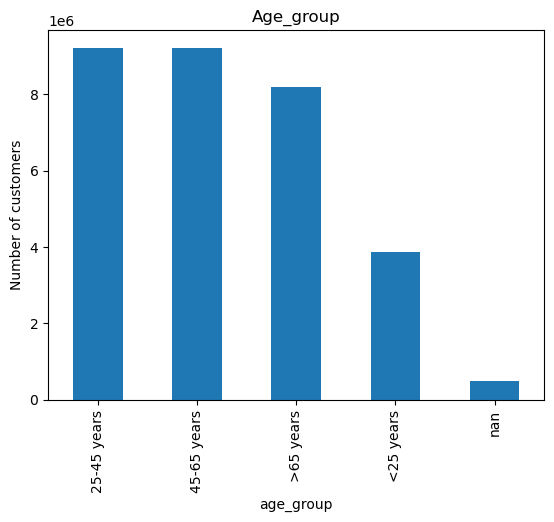

In [40]:
Instacart_keep['age_group'].value_counts(dropna = False).plot.bar()
# Set title and axis labels
plt.title('Age_group')
plt.ylabel('Number of customers')
plt.xlabel('age_group')
# Save figure
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_group bar chart.png'), bbox_inches = 'tight')

# 02 Income

As per the income column in the data, the highest household income is $593901 the lowest household income is $25903 and the average household income is
$99437.74. Let's categorize the household income in three categories, Low(<50000), Average(50000-100000), and High(>1000000) 

In [41]:
Instacart_keep.loc[Instacart_keep['income'] <= 50000, 'income_group'] = 'Low'

C:\Users\Kalyani\AppData\Local\Temp\ipykernel_17188\1488315063.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Instacart_keep.loc[Instacart_keep['income'] <= 50000, 'income_group'] = 'Low'


In [42]:
Instacart_keep.loc[(Instacart_keep['income'] > 50000) & (Instacart_keep['income'] < 100000), 'income_group'] = 'Average'

In [43]:
Instacart_keep.loc[Instacart_keep['income'] >= 100000, 'income_group'] = 'High'

In [44]:
Instacart_keep['income_group'].value_counts(dropna = False)

income_group
High       14207402
Average    13394608
Low         3362554
Name: count, dtype: int64

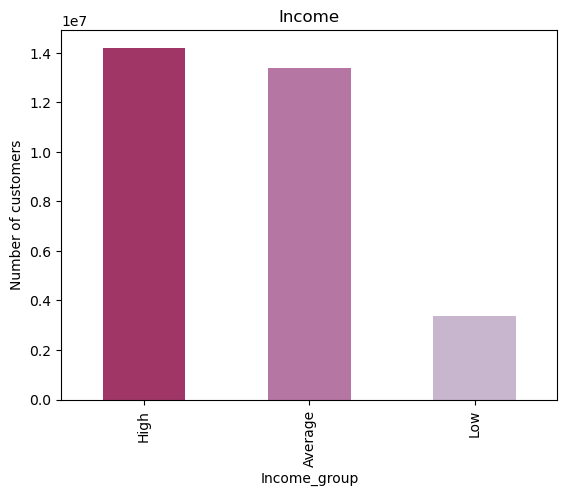

In [45]:
Instacrt_keep_bar = Instacart_keep['income_group'].value_counts().plot.bar(color =['#a03666', '#b576a4','#c8b5ce'])
# Set title and axis labels
plt.title('Income')
plt.ylabel('Number of customers')
plt.xlabel('Income_group')
# Save figure
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income bar chart.png'), bbox_inches = 'tight')

# 03 Number of Dependants 

There would be two sub-categories of number of dependants as 'has_dependant' and 'no_dependants'

In [46]:
Instacart_keep.loc[Instacart_keep['n_dependants'] == 0, 'Dependant(Y/N)'] = 'no_dependant'

C:\Users\Kalyani\AppData\Local\Temp\ipykernel_17188\997035321.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Instacart_keep.loc[Instacart_keep['n_dependants'] == 0, 'Dependant(Y/N)'] = 'no_dependant'


In [47]:
Instacart_keep.loc[Instacart_keep['n_dependants'] > 0, 'Dependant(Y/N)'] = 'has_dependant'

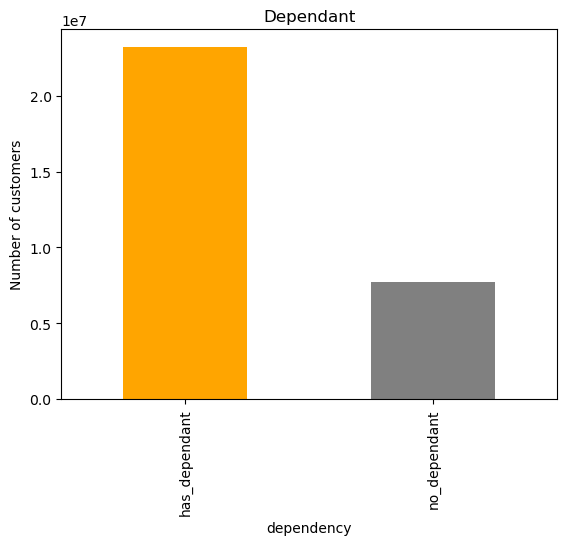

In [48]:
Instacart_keep['Dependant(Y/N)'].value_counts(dropna = False).plot.bar(color = ['orange', 'grey'])
# Set title and axis labels
plt.title('Dependant')
plt.ylabel('Number of customers')
plt.xlabel('dependency')
# Save figure
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'dependency bar chart.png'), bbox_inches = 'tight')

# 04 Order_hour_of_day

In [49]:
Instacart_keep.loc[Instacart_keep['order_hour_of_day'].between(10, 17), 'shopping_hours'] = 'normal' 

C:\Users\Kalyani\AppData\Local\Temp\ipykernel_17188\3828779379.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Instacart_keep.loc[Instacart_keep['order_hour_of_day'].between(10, 17), 'shopping_hours'] = 'normal'


In [50]:
Instacart_keep.loc[Instacart_keep['order_hour_of_day'].between(18,23), 'shopping_hours'] = 'late_night' 

In [51]:
Instacart_keep.loc[Instacart_keep['order_hour_of_day'].between(0, 9 ), 'shopping_hours'] = 'early_morning' 

In [52]:
Instacart_keep['shopping_hours'].value_counts(dropna = False)

shopping_hours
normal           19799590
early_morning     5734278
late_night        5430696
Name: count, dtype: int64

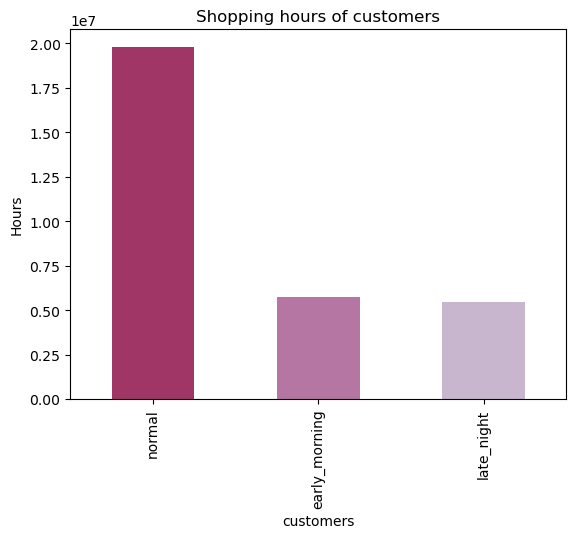

In [53]:
Instacrt_keep_shopping_hours_bar = Instacart_keep['shopping_hours'].value_counts().plot.bar(color =['#a03666', '#b576a4','#c8b5ce'])
# Set title and axis labels
plt.title('Shopping hours of customers')
plt.ylabel('Hours')
plt.xlabel('customers')
# Save figure
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'shopping hours of customers.png'), bbox_inches = 'tight')

# 05 Marital Status

In [54]:
Instacart_keep['marital_status'].value_counts(dropna = False)

marital_status
married                             21743711
single                               5094410
divorced/widowed                     2645271
living with parents and siblings     1481172
Name: count, dtype: int64

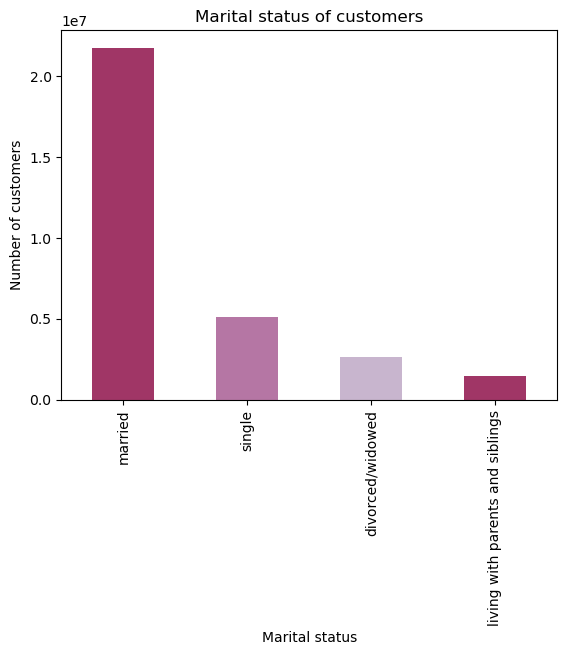

In [55]:
Instacrt_keep_marital_status_bar = Instacart_keep['marital_status'].value_counts().plot.bar(color =['#a03666', '#b576a4','#c8b5ce'])
# Set title and axis labels
plt.title('Marital status of customers')
plt.ylabel('Number of customers')
plt.xlabel('Marital status')
# Save figure
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'marital status bar chart.png'), bbox_inches = 'tight')

# Step 6 Create an appropriate visualization to show the distribution of profiles.

In [56]:
# I have created a sample of the dataframe, which contains the needed columns only

In [57]:
Instacart_keep.columns

Index(['order_id', 'user_id', 'order_number', 'order_day_of_week',
       'order_hour_of_day', 'days_since_previous_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'Busiest_day',
       'Busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'mean_of_prices', 'spender_flag', 'median_of_days', 'frequency_flag',
       'gender', 'state', 'age', 'date_joined', 'n_dependants',
       'marital_status', 'income', '_merge', 'region', 'exclusion_flag',
       'age_group', 'income_group', 'Dependant(Y/N)', 'shopping_hours'],
      dtype='object')

In [58]:
df_sample = Instacart_keep[['user_id', 'income', 'region', 'age_group', 'income_group', 'Dependant(Y/N)', 'shopping_hours', 'marital_status']]

In [59]:
df_sample.head()

,user_id,income,region,age_group,income_group,Dependant(Y/N),shopping_hours,marital_status
0,1,40423,south,25-45 years,Low,has_dependant,early_morning,married
1,1,40423,south,25-45 years,Low,has_dependant,early_morning,married
2,1,40423,south,25-45 years,Low,has_dependant,normal,married
3,1,40423,south,25-45 years,Low,has_dependant,early_morning,married
4,1,40423,south,25-45 years,Low,has_dependant,normal,married


In [60]:
df_sample = df_sample.drop_duplicates()

In [61]:
df_sample

,user_id,income,region,age_group,income_group,Dependant(Y/N),shopping_hours,marital_status
0,1,40423,south,25-45 years,Low,has_dependant,early_morning,married
2,1,40423,south,25-45 years,Low,has_dependant,normal,married
59,15,54313,midwest,>65 years,Average,no_dependant,early_morning,divorced/widowed
60,15,54313,midwest,>65 years,Average,no_dependant,normal,divorced/widowed
131,19,151988,south,45-65 years,High,has_dependant,normal,married
...,...,...,...,...,...,...,...,...
32404819,120516,76190,west,<25 years,Average,no_dependant,early_morning,single
32404820,120516,76190,west,<25 years,Average,no_dependant,normal,single
32404829,106143,53755,west,<25 years,Average,no_dependant,late_night,single
32404830,106143,53755,west,<25 years,Average,no_dependant,normal,single


# Age

In [62]:
# Piechart would be a good option to compare

In [63]:
#Value counts for age_group column
counts = df_sample['age_group'].value_counts()

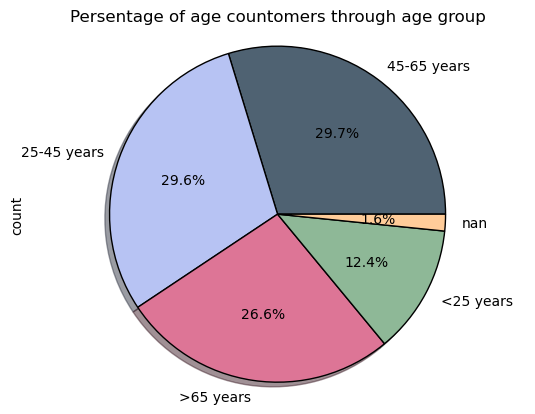

<Figure size 640x480 with 0 Axes>

In [64]:

counts.plot.pie(            #create pie-chart
    autopct='%1.1f%%',      # Show percentage
    shadow=True,            # Show shadow
    colors = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897', '#ffcc99'], #assign colors
    labels = counts.index,
    wedgeprops = {'edgecolor' : 'black'}) # boarders
    

plt.title('Persentage of age countomers through age group')  # title to chart

plt.axis('equal')
plt.show()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'customers_age_groups_pie.png'), bbox_inches = 'tight') # Save

# Income

In [65]:
income_counts = df_sample['income_group'].value_counts()

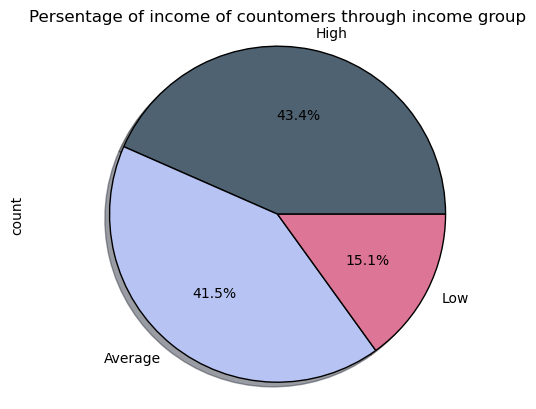

<Figure size 640x480 with 0 Axes>

In [66]:
income_counts.plot.pie(            #create pie-chart
    autopct='%1.1f%%',      # Show percentage
    shadow=True,            # Show shadow
    colors = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897', '#ffcc99'], #assign colors
    labels = income_counts.index,
    wedgeprops = {'edgecolor' : 'black'}) # boarders
    

plt.title('Persentage of income of countomers through income group')  # title to chart

plt.axis('equal')
plt.show()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'customers_income_groups_pie.png'), bbox_inches = 'tight') # Save

# Number of  dependants

In [67]:
dependants_counts = df_sample['Dependant(Y/N)'].value_counts()

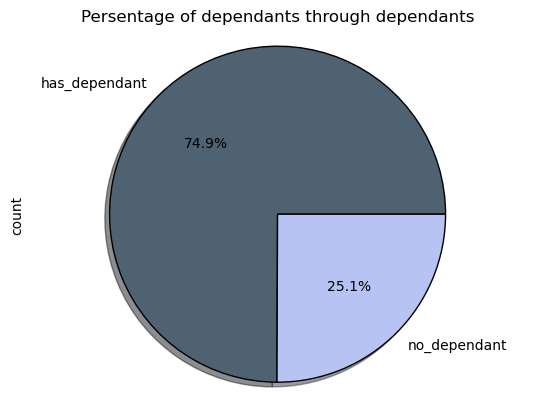

<Figure size 640x480 with 0 Axes>

In [68]:
dependants_counts.plot.pie(            #create pie-chart
    autopct='%1.1f%%',      # Show percentage
    shadow=True,            # Show shadow
    colors = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897', '#ffcc99'], #assign colors
    labels = dependants_counts.index,
    wedgeprops = {'edgecolor' : 'black'}) # boarders
    

plt.title('Persentage of dependants through dependants')  # title to chart

plt.axis('equal')
plt.show()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'customers_dependants_pie.png'), bbox_inches = 'tight') # Save

# Shopping hours

In [69]:
shopping_hours_counts = df_sample['shopping_hours'].value_counts()

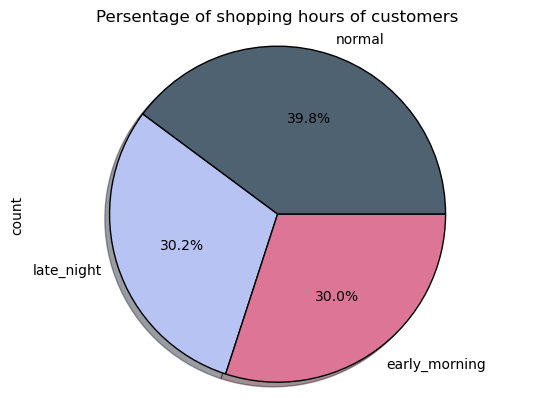

<Figure size 640x480 with 0 Axes>

In [70]:
shopping_hours_counts.plot.pie(            #create pie-chart
    autopct='%1.1f%%',      # Show percentage
    shadow=True,            # Show shadow
    colors = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897', '#ffcc99'], #assign colors
    labels = shopping_hours_counts.index,
    wedgeprops = {'edgecolor' : 'black'}) # boarders
    

plt.title('Persentage of shopping hours of customers')  # title to chart

plt.axis('equal')
plt.show()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'customers_dependants_pie.png'), bbox_inches = 'tight') # Save

# Step 7

In [71]:
# Here usage_frequency and expenditure is related to days_since_previous_order and prices respectively

In [72]:
orders_subset = Instacart_keep.groupby(['user_id', 'age_group', 'income_group', 'Dependant(Y/N)', 'loyalty_flag', 'region', 'order_number', 'days_since_previous_order'])['prices'].sum().reset_index()

In [73]:
orders_subset

,user_id,age_group,income_group,Dependant(Y/N),loyalty_flag,region,order_number,days_since_previous_order,prices
0,1,25-45 years,Low,has_dependant,New customer,south,2,15.0,35.4
1,1,25-45 years,Low,has_dependant,New customer,south,3,21.0,28.2
2,1,25-45 years,Low,has_dependant,New customer,south,4,29.0,26.0
3,1,25-45 years,Low,has_dependant,New customer,south,5,28.0,57.0
4,1,25-45 years,Low,has_dependant,New customer,south,6,19.0,25.0
...,...,...,...,...,...,...,...,...,...
2901748,206209,>65 years,High,has_dependant,Regular customer,midwest,9,22.0,26.2
2901749,206209,>65 years,High,has_dependant,Regular customer,midwest,10,29.0,64.7
2901750,206209,>65 years,High,has_dependant,Regular customer,midwest,11,30.0,56.1
2901751,206209,>65 years,High,has_dependant,Regular customer,midwest,12,18.0,131.5


In [74]:
orders_subset.to_clipboard()

In [75]:
# Aggregations by age group

In [76]:
# max, min, mean by age category
aggregations_by_age = orders_subset.groupby('age_group').agg({'days_since_previous_order' : ['min', 'mean', 'max'], 
                                                                  'prices' : ['min', 'mean', 'max']})

In [77]:
# Check aggregations
aggregations_by_age

days_since_previous_order                  prices              \
                                  min       mean   max    min        mean   
age_group                                                                   
25-45 years                       0.0  10.403753  30.0    1.0  119.309617   
45-65 years                       0.0  10.384391  30.0    1.0  119.489698   
<25 years                         0.0  10.380577  30.0    1.0  123.717587   
>65 years                         0.0  10.372165  30.0    1.0  117.902487   
nan                               0.0  10.341135  30.0    1.0  178.311032   

                       
                  max  
age_group              
25-45 years  100384.5  
45-65 years  100452.9  
<25 years    100265.6  
>65 years    100330.2  
nan          100310.0

In [78]:
# Aggregation by income_group

In [79]:
# max, min, mean by age category
aggregations_by_income = orders_subset.groupby('income_group').agg({'days_since_previous_order' : ['min', 'mean', 'max'], 
                                                                  'prices' : ['min', 'mean', 'max']})

In [80]:
aggregations_by_income

days_since_previous_order                  prices              \
                                   min       mean   max    min        mean   
income_group                                                                 
Average                            0.0  10.290050  30.0    1.0   87.647440   
High                               0.0  10.260946  30.0    1.0  173.326813   
Low                                0.0  11.070341  30.0    1.0   52.673028   

                        
                   max  
income_group            
Average       100264.7  
High          100452.9  
Low              875.0

In [81]:
# Aggregations by number of dependants

In [82]:
aggregations_by_Dependant = orders_subset.groupby('Dependant(Y/N)').agg({'days_since_previous_order' : ['min', 'mean', 'max'], 
                                                                  'prices' : ['min', 'mean', 'max']})

In [83]:
aggregations_by_Dependant

days_since_previous_order                  prices              \
                                     min       mean   max    min        mean   
Dependant(Y/N)                                                                 
has_dependant                        0.0  10.388225  30.0    1.0  120.027807   
no_dependant                         0.0  10.378169  30.0    1.0  121.866791   

                          
                     max  
Dependant(Y/N)            
has_dependant   100452.9  
no_dependant    100384.5

# Step 8 Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

# Comparison of customer profiles by regions
A histogram would be a good choice to show a comparison between different age group by regions

C:\Users\Kalyani\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


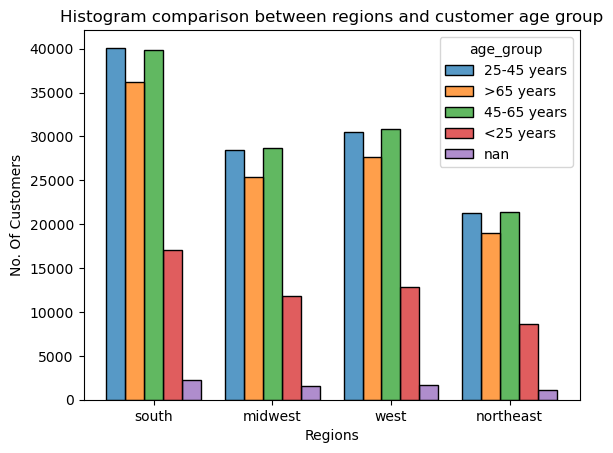

In [84]:
# Creating a histogram for age_group and regions
sns.histplot(data=df_sample, x="region", hue="age_group", multiple="dodge", shrink=.8, color='#69b3a2')
 
# Adding labels and title
plt.xlabel('Regions')
plt.ylabel('No. Of Customers')
plt.title('Histogram comparison between regions and customer age group')
 
# Display the plot and Save
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'instacart_age_by_region.png'), bbox_inches = 'tight')
plt.show()

C:\Users\Kalyani\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


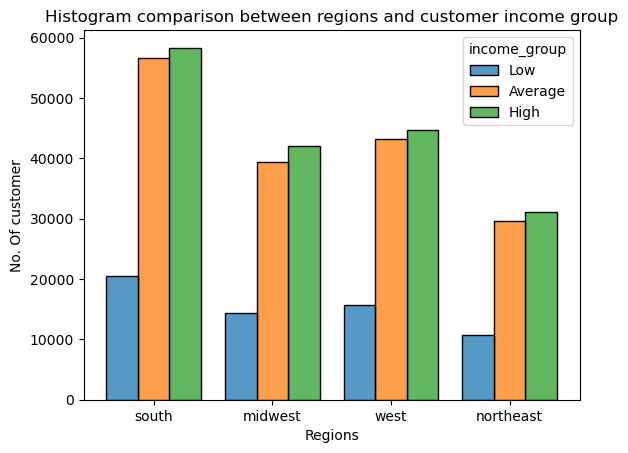

In [85]:
# Creating a histogram for income group and regions
sns.histplot(data=df_sample, x="region", hue="income_group", multiple="dodge", color=['skyblue', 'orange', 'black'], shrink=.8)
 
# Adding labels and title
plt.xlabel('Regions')
plt.ylabel('No. Of customer')
plt.title('Histogram comparison between regions and customer income group')
 
# Display the plot and Save
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'instacart_income_by_region.png'), bbox_inches = 'tight')
plt.show()

C:\Users\Kalyani\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


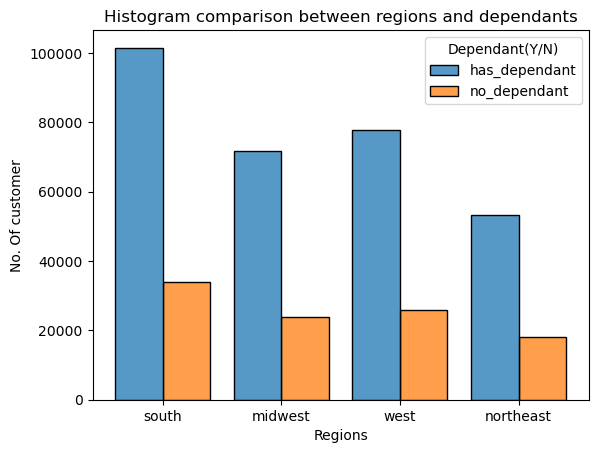

In [86]:
# Creating a histogram for deoendants and regions
sns.histplot(data=df_sample, x="region", hue="Dependant(Y/N)", multiple="dodge", shrink=.8)
 
# Adding labels and title
plt.xlabel('Regions')
plt.ylabel('No. Of customer')
plt.title('Histogram comparison between regions and dependants')
 
# Display the plot and Save
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'dependants_by_region.png'), bbox_inches = 'tight')
plt.show()

C:\Users\Kalyani\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


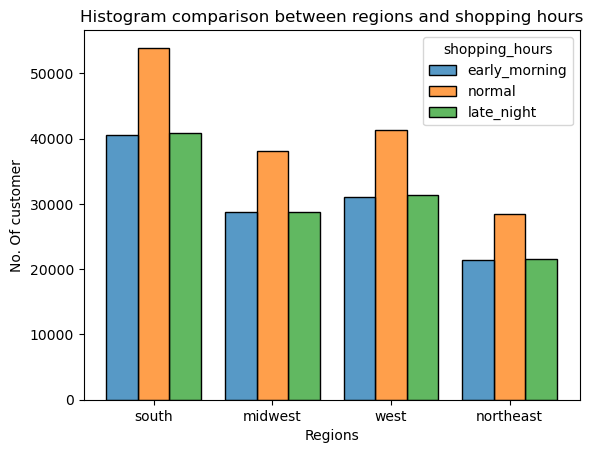

In [87]:
# Creating a histogram for income group and regions
sns.histplot(data=df_sample, x="region", hue="shopping_hours", multiple="dodge", color=['skyblue', 'orange', 'black'], shrink=.8)
 
# Adding labels and title
plt.xlabel('Regions')
plt.ylabel('No. Of customer')
plt.title('Histogram comparison between regions and shopping hours')
 
# Display the plot and Save
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'shopping_hours_by_region.png'), bbox_inches = 'tight')
plt.show()

# Comparison of customer profiles by department
A histogram would be a good choice to show a comparison between different age group by department

In [88]:
# Lets import department_id file.
df_dep = pd.read_csv(os.path.join(path, '02 Data', 'Original_data', '4.4_departments', 'departments.csv'))

In [89]:
# lets check detaframe
df_dep

,department_id,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,department,frozen,other,bakery,produce,alcohol,international,beverages,pets,dry goods pasta,...,meat seafood,pantry,breakfast,canned goods,dairy eggs,household,babies,snacks,deli,missing


In [90]:
# lets transpose dataframe
df_dep_t = df_dep.T

In [91]:
# Create index
df_dep_t.reset_index(inplace = True)

In [92]:
# set variable
new_header = df_dep_t.iloc[0]

In [93]:
# Remove row 0
df_dep_t = df_dep_t[1:]

In [94]:
# Assign header row
df_dep_t.columns = new_header

In [95]:
# Check dataframe
df_dep_t

,department_id,department
1,1,frozen
2,2,other
3,3,bakery
4,4,produce
5,5,alcohol
6,6,international
7,7,beverages
8,8,pets
9,9,dry goods pasta
10,10,bulk


In [96]:
# lets check the department_id has the same datatype as 'int' to merge with the Instacart_keep dataframe.
df_dep_t['department_id'] = df_dep_t['department_id'].astype('int8')

In [97]:
Instacart_keep.columns

Index(['order_id', 'user_id', 'order_number', 'order_day_of_week',
       'order_hour_of_day', 'days_since_previous_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'Busiest_day',
       'Busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'mean_of_prices', 'spender_flag', 'median_of_days', 'frequency_flag',
       'gender', 'state', 'age', 'date_joined', 'n_dependants',
       'marital_status', 'income', '_merge', 'region', 'exclusion_flag',
       'age_group', 'income_group', 'Dependant(Y/N)', 'shopping_hours'],
      dtype='object')

In [98]:
# Rename 'prices' to 'order_total'
Instacart_keep.rename(columns = {'_merge' : '_merge_1'}, inplace = True)

C:\Users\Kalyani\AppData\Local\Temp\ipykernel_17188\1514883838.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Instacart_keep.rename(columns = {'_merge' : '_merge_1'}, inplace = True)


In [99]:
Instacart_keep.columns

Index(['order_id', 'user_id', 'order_number', 'order_day_of_week',
       'order_hour_of_day', 'days_since_previous_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'Busiest_day',
       'Busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'mean_of_prices', 'spender_flag', 'median_of_days', 'frequency_flag',
       'gender', 'state', 'age', 'date_joined', 'n_dependants',
       'marital_status', 'income', '_merge_1', 'region', 'exclusion_flag',
       'age_group', 'income_group', 'Dependant(Y/N)', 'shopping_hours'],
      dtype='object')

In [100]:
Instacart_keep['_merge_1'].value_counts(dropna = False)

_merge_1
both          30964564
left_only            0
right_only           0
Name: count, dtype: int64

In [101]:
# Merge on department_id
instacart_full = Instacart_keep.merge(df_dep_t, on = 'department_id', indicator = True)

In [102]:
instacart_full.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_previous_order,product_id,add_to_cart_order,reordered,product_name,...,income,_merge_1,region,exclusion_flag,age_group,income_group,Dependant(Y/N),shopping_hours,department,_merge
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,40423,both,south,To_keep,25-45 years,Low,has_dependant,early_morning,beverages,both
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,40423,both,south,To_keep,25-45 years,Low,has_dependant,early_morning,beverages,both
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,40423,both,south,To_keep,25-45 years,Low,has_dependant,normal,beverages,both
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,40423,both,south,To_keep,25-45 years,Low,has_dependant,early_morning,beverages,both
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,40423,both,south,To_keep,25-45 years,Low,has_dependant,normal,beverages,both


In [103]:
# Check frequency of new merge flag
instacart_full['_merge'].value_counts(dropna = False)

_merge
both          30964564
left_only            0
right_only           0
Name: count, dtype: int64

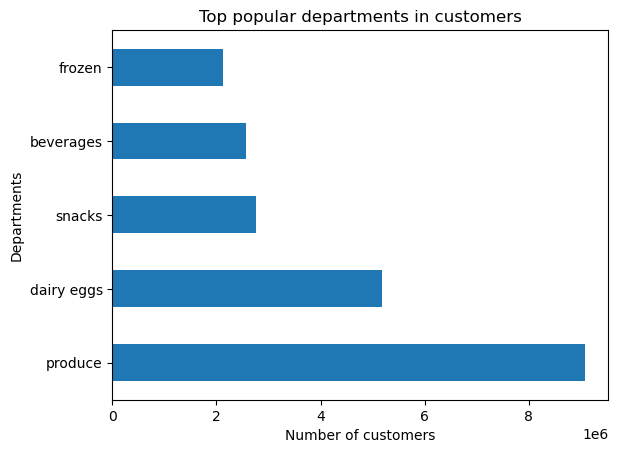

In [104]:
instacart_full['department'].value_counts().head().plot.barh()
# Set title and axis labels
plt.title('Top popular departments in customers')
plt.xlabel('Number of customers')
plt.ylabel('Departments')
# Save figure
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'top popular department.png'), bbox_inches = 'tight')                                                                                                                                  

In [105]:
# lets create crosstab between department and age_group
instacart_cross = pd.crosstab(instacart_full['department'], instacart_full['age_group'],dropna = False)

In [106]:
instacart_cross

age_group,25-45 years,45-65 years,<25 years,>65 years,nan
department,,,,,
alcohol,42167,43265,19188,36693,3314
babies,123044,122655,51234,106204,7255
bakery,334154,332856,139873,295997,17948
beverages,754851,771896,318343,684020,42791
breakfast,198803,200667,85477,175296,10607
bulk,9902,9779,4306,8945,519
canned goods,302479,300281,126312,267509,15493
dairy eggs,1549127,1531299,647493,1368072,81191
deli,299970,298462,124555,265199,15648


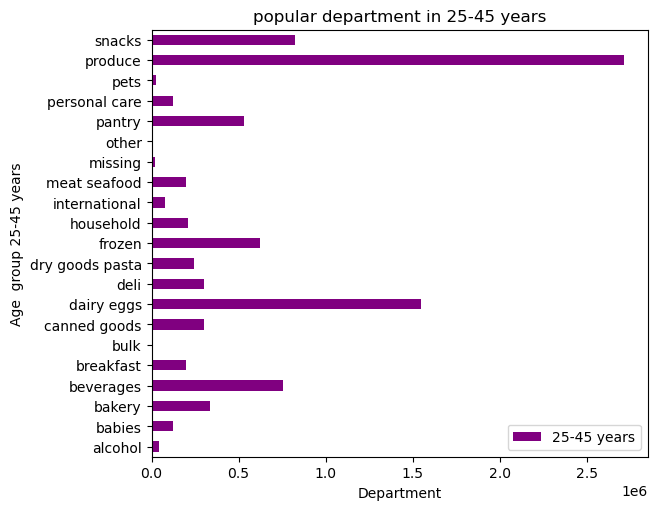

In [108]:
instacart_adult_bar = instacart_cross.sort_values(by = 'department', ascending = True).groupby('department')['25-45 years'].sum()
instacart_adult_bar.plot.barh(legend = True, title = 'popular department in 25-45 years', color = 'purple')
from importlib import reload
plt=reload(plt)
# Adjust plot size
plt.subplots_adjust(top = 1.0)
# set Axix label
plt.ylabel('Age  group 25-45 years')
plt.xlabel('Department')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'popular department in 25-45 years.png'), bbox_inches = 'tight') # Save                                                                                                                                 

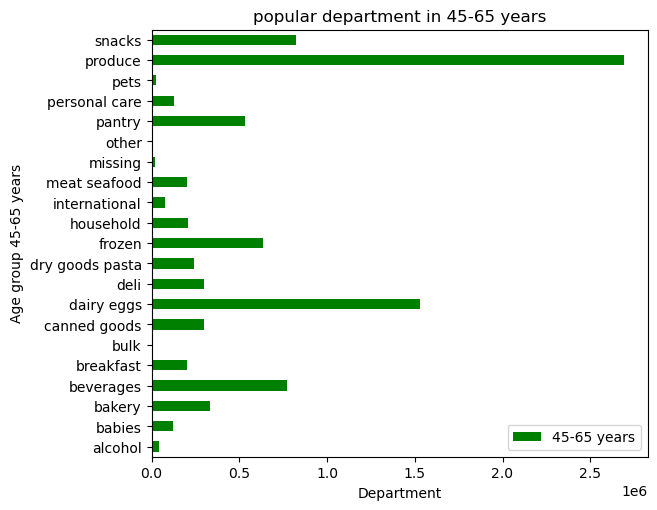

In [109]:
instacart_mid_adult_bar = instacart_cross.sort_values(by = 'department', ascending = True).groupby('department')['45-65 years'].sum()
instacart_mid_adult_bar.plot.barh(legend = True, title = 'popular department in 45-65 years', color = 'green')
from importlib import reload
plt=reload(plt)
# Adjust plot size
plt.subplots_adjust(top = 1.0)
# set Axix label
plt.ylabel('Age group 45-65 years')
plt.xlabel('Department')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'popular department in mid_adults.png'), bbox_inches = 'tight') # Save                                                                                                       

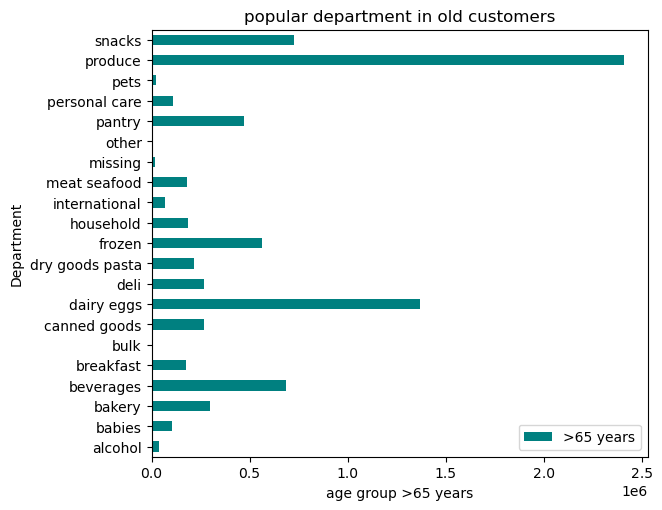

In [111]:
instacart_old_bar = instacart_cross.sort_values(by = 'department', ascending = True).groupby('department')['>65 years'].sum()
instacart_old_bar.plot.barh(legend = True, title = 'popular department in old customers', color = 'teal')
from importlib import reload
plt=reload(plt)
# Adjust plot size
plt.subplots_adjust(top = 1.0)
# set Axix label
plt.xlabel('age group >65 years')
plt.ylabel('Department')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'popular department in old customers.png'), bbox_inches = 'tight') # Save                                                                                                      

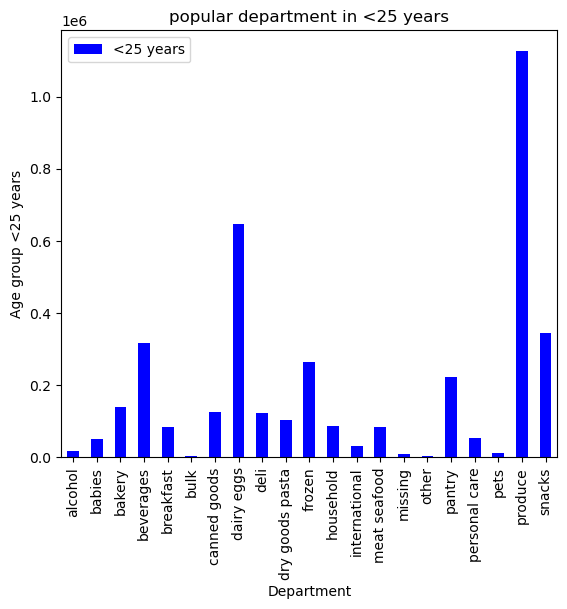

In [112]:
instacart_adult_bar = instacart_cross.sort_values(by = 'department', ascending = True).groupby('department')['<25 years'].sum()
instacart_adult_bar.plot.bar(legend = True, title = 'popular department in <25 years', color = 'blue')
from importlib import reload
plt=reload(plt)
# Adjust plot size
plt.subplots_adjust(top = 1.0)
# set Axix label
plt.ylabel('Age group <25 years')
plt.xlabel('Department')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'popular department in young_adults.png'), bbox_inches = 'tight') # Save

# Income_group

In [113]:
#create crosstab between department and income_group
instacart_cross_income = pd.crosstab(instacart_full['department'], instacart_full['income_group'],dropna = False)

In [114]:
instacart_cross_income

income_group,Average,High,Low
department,,,
alcohol,57438,69142,18047
babies,184448,196704,29240
bakery,486360,527711,106757
beverages,1062318,1126462,383121
breakfast,281846,297596,91408
bulk,14557,14218,4676
canned goods,447846,485253,78975
dairy eggs,2268608,2406211,502363
deli,435287,462099,106448


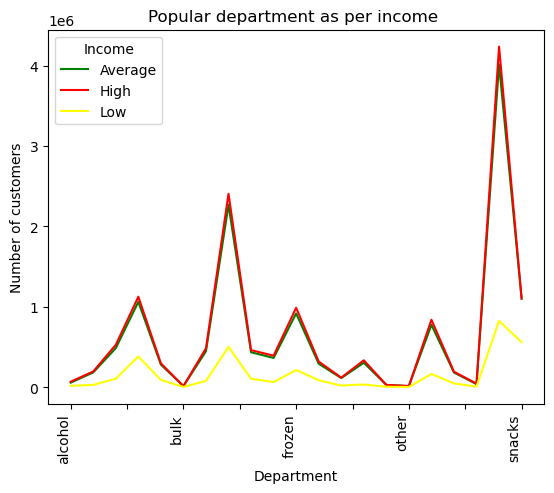

In [115]:
beh_dep_line = instacart_cross_income.plot(kind = 'line', stacked = False, color = ['green','red','yellow'])
# Adjust plot size
plt.subplots_adjust(bottom = 0.1)
# Add axis and title labels
plt.title('Popular department as per income ')
plt.xlabel('Department')
plt.ylabel('Number of customers')
# Add x tick mark labels, position adjusted
plt.xticks(rotation =90, ha = 'right')
# Add legend title
plt.legend(title = 'Income')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'popular department as per income.png'), bbox_inches = 'tight') # Save

In [116]:
# Create crosstab between department and dependant(Y/N) columns
instacart_dependant_cross = pd.crosstab(instacart_full['department'], instacart_full['Dependant(Y/N)'],dropna = False)

In [117]:
#check crosstab
instacart_dependant_cross

Dependant(Y/N),has_dependant,no_dependant
department,,
alcohol,107800,36827
babies,307064,103328
bakery,839433,281395
beverages,1926560,645341
breakfast,504418,166432
bulk,25451,8000
canned goods,761054,251020
dairy eggs,3882806,1294376
deli,750452,253382


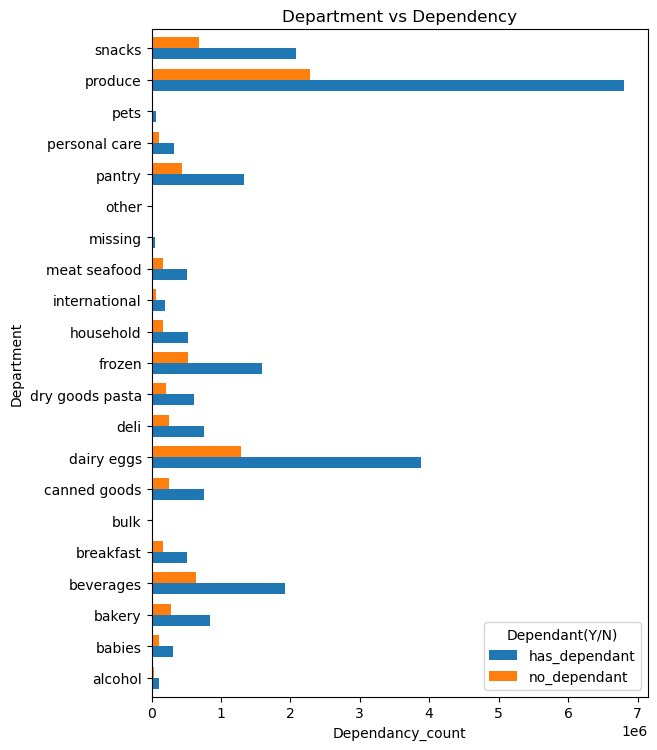

In [118]:
instacart_dependant_cross.plot.barh(width = 0.7)
# Adjust plot size
plt.subplots_adjust(top = 1.5)
# Add axis, title labels
plt.title('Department vs Dependency')
plt.xlabel('Dependancy_count')
plt.ylabel('Department')
# save figure
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'dependency vs department.png'), bbox_inches = 'tight') # Save



In [119]:
# create crosstab for department vs shopping hours
instacart_shopping_hours_cross = pd.crosstab(instacart_full['department'], instacart_full['shopping_hours'],dropna = False)

In [120]:
# Ckeck crosstab
instacart_shopping_hours_cross

shopping_hours,early_morning,late_night,normal
department,,,
alcohol,19159,20826,104642
babies,88680,78755,242957
bakery,209700,191037,720091
beverages,483344,427315,1661242
breakfast,134721,117432,418697
bulk,6232,6090,21129
canned goods,176686,173481,661907
dairy eggs,1005277,902200,3269705
deli,178132,175379,650323


In [121]:
# Lets recheck sum of all coloumns 
instacart_shopping_hours_cross[['early_morning','late_night', 'normal']].sum(axis = 0)

shopping_hours
early_morning     5734278
late_night        5430696
normal           19799590
dtype: int64

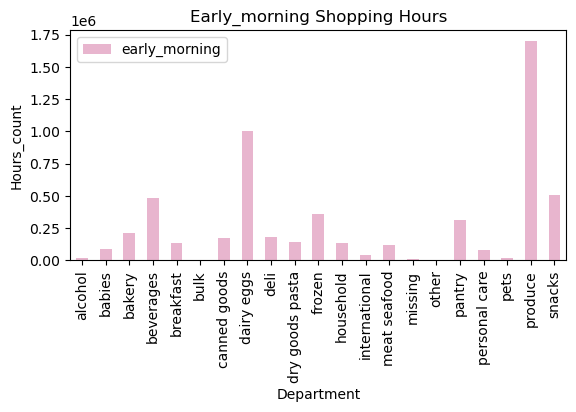

In [122]:
instacart_mid_adult_bar = instacart_shopping_hours_cross.sort_values(by = 'department', ascending = True).groupby('department')['early_morning'].sum().plot.bar(color = '#e8b5ce', legend = True)
# Adjust plot size
plt.subplots_adjust(bottom = 0.4)
# Add axis, title labels
plt.title('Early_morning Shopping Hours')
plt.xlabel('Department')
plt.ylabel('Hours_count')
# save figure
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'early_morning_shopping_hours.png'), bbox_inches = 'tight') # Save


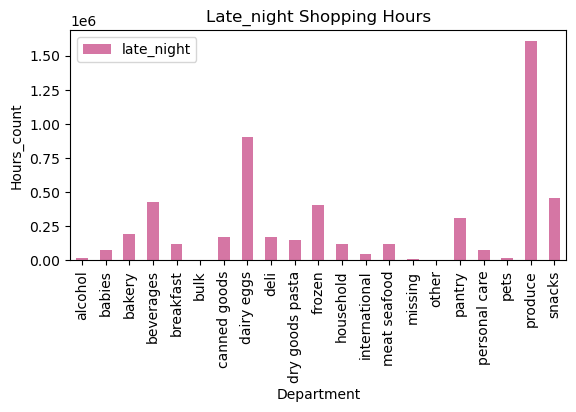

In [123]:
instacart_mid_adult_bar = instacart_shopping_hours_cross.sort_values(by = 'department', ascending = True).groupby('department')['late_night'].sum().plot.bar(color = '#d576a4', legend = True)
# Adjust plot size
plt.subplots_adjust(bottom = 0.4)
# Add axis, title labels
plt.title('Late_night Shopping Hours')
plt.xlabel('Department')
plt.ylabel('Hours_count')
# save figure
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'late_night_shopping_hours.png'), bbox_inches = 'tight') # Save


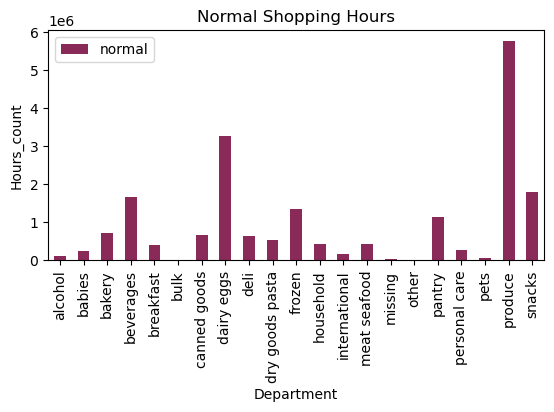

In [124]:
ic_shopping_hour_normal_bar = instacart_shopping_hours_cross.sort_values(by = 'department', ascending = True).groupby('department')['normal'].sum().plot.bar(color= '#892a58', legend = True)
# Adjust plot size
plt.subplots_adjust(bottom = 0.4)
# Add axis, title labels
plt.title('Normal Shopping Hours')
plt.xlabel('Department')
plt.ylabel('Hours_count')
# save figure
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'normal_shopping_hours.png'), bbox_inches = 'tight') # Save
